# Team ID:PNT2022TMID30209

#### Title: Assignment 4
## Author: Sparsha S


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 2. Loading the dataset

In [2]:
data = pd.read_csv(r"C:\Documents\IBM\Dataset\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Visualizations

# 3. i) Univariate Analysis

C:\Users\spars\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

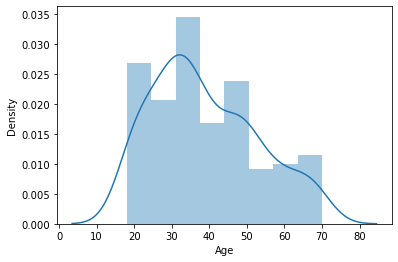

In [4]:
sns.distplot(data['Age'])

C:\Users\spars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

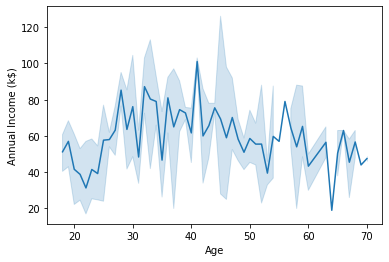

In [5]:
sns.lineplot(data['Age'], data['Annual Income (k$)'])

C:\Users\spars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

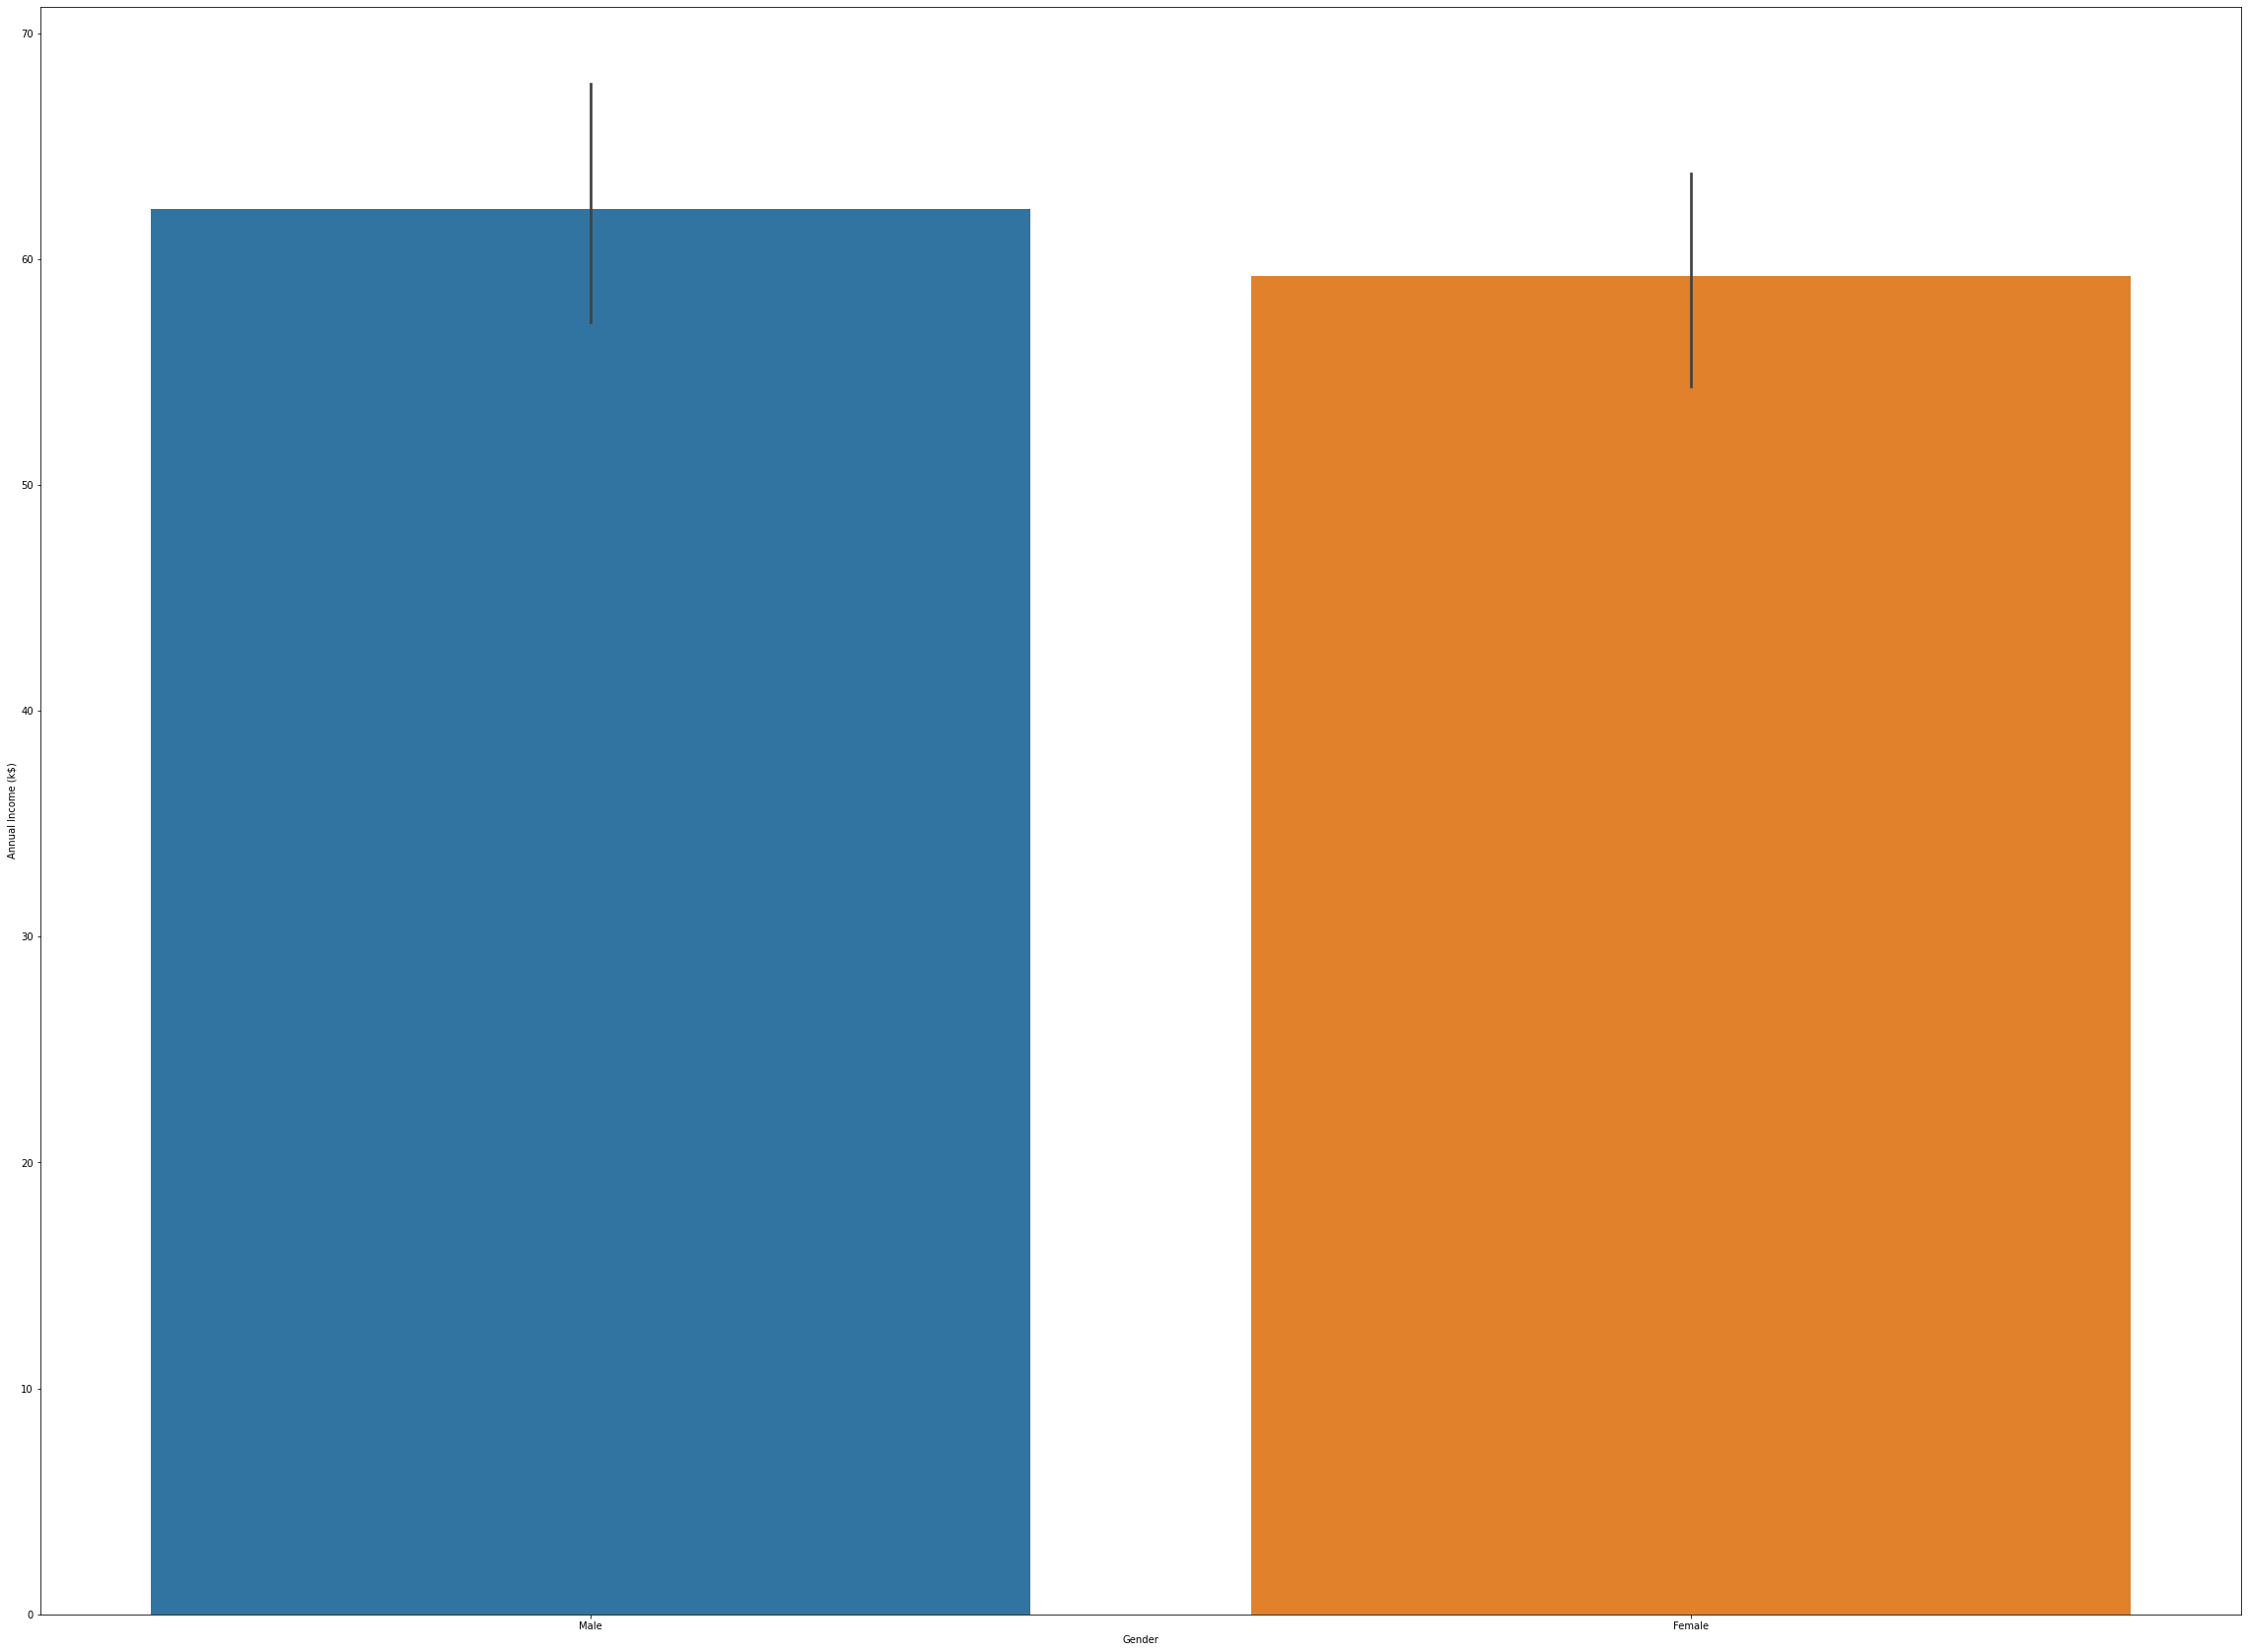

In [6]:
plt.figure(figsize=(40,30))
sns.barplot(data['Gender'], data['Annual Income (k$)'])

# 3. iii) Multivariate Analysis

C:\Users\spars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

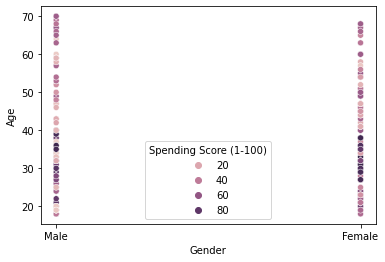

In [7]:
sns.scatterplot(data['Gender'], data['Age'], hue = data['Spending Score (1-100)'])

<AxesSubplot:>

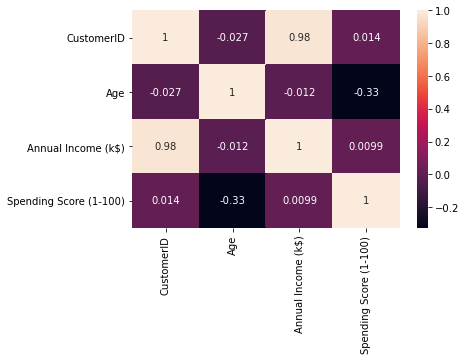

In [8]:
sns.heatmap(data.corr(), annot = True)

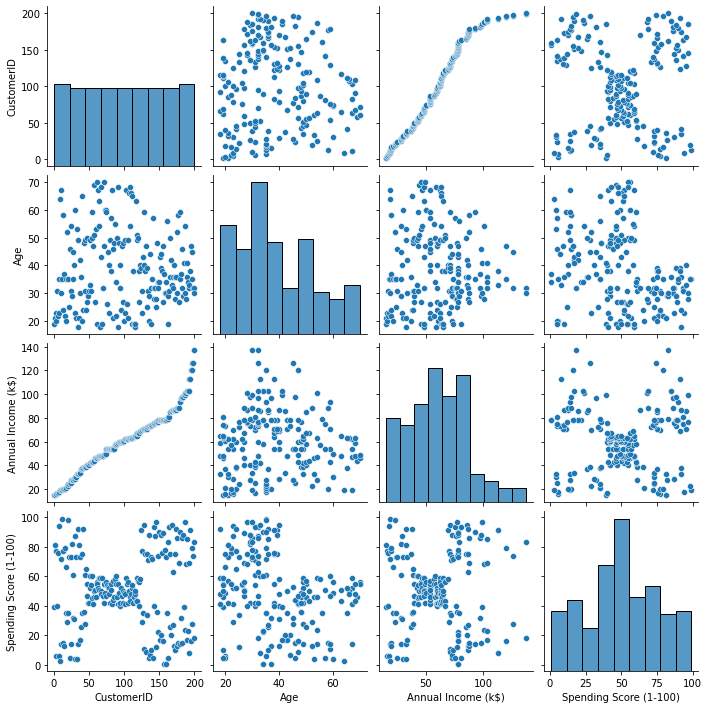

In [9]:
sns.pairplot(data)

# 4. Descriptive Statistics

## Central Tendency

In [10]:
data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [11]:
data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [12]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


##  Dispersion of Data

C:\Users\spars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

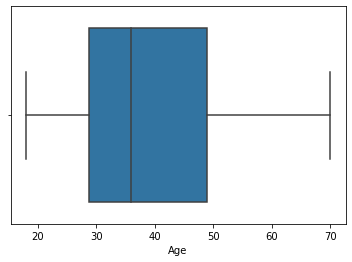

In [13]:
sns.boxplot(data['Age'])

### Interquartile Range

In [14]:
q = data.quantile([0.75, 0.25])

In [15]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [16]:
iqr = q.iloc[0] - q.iloc[1]

In [17]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [18]:
u = q.iloc[0] + 1.5*iqr 
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [19]:
l = q.iloc[1] - 1.5*iqr
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

### Variance

In [20]:
data.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

### Standard Deviation

In [21]:
data.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

# 5. Checking and Dealing with missing values

In [22]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Outliers and Replacing them

<AxesSubplot:>

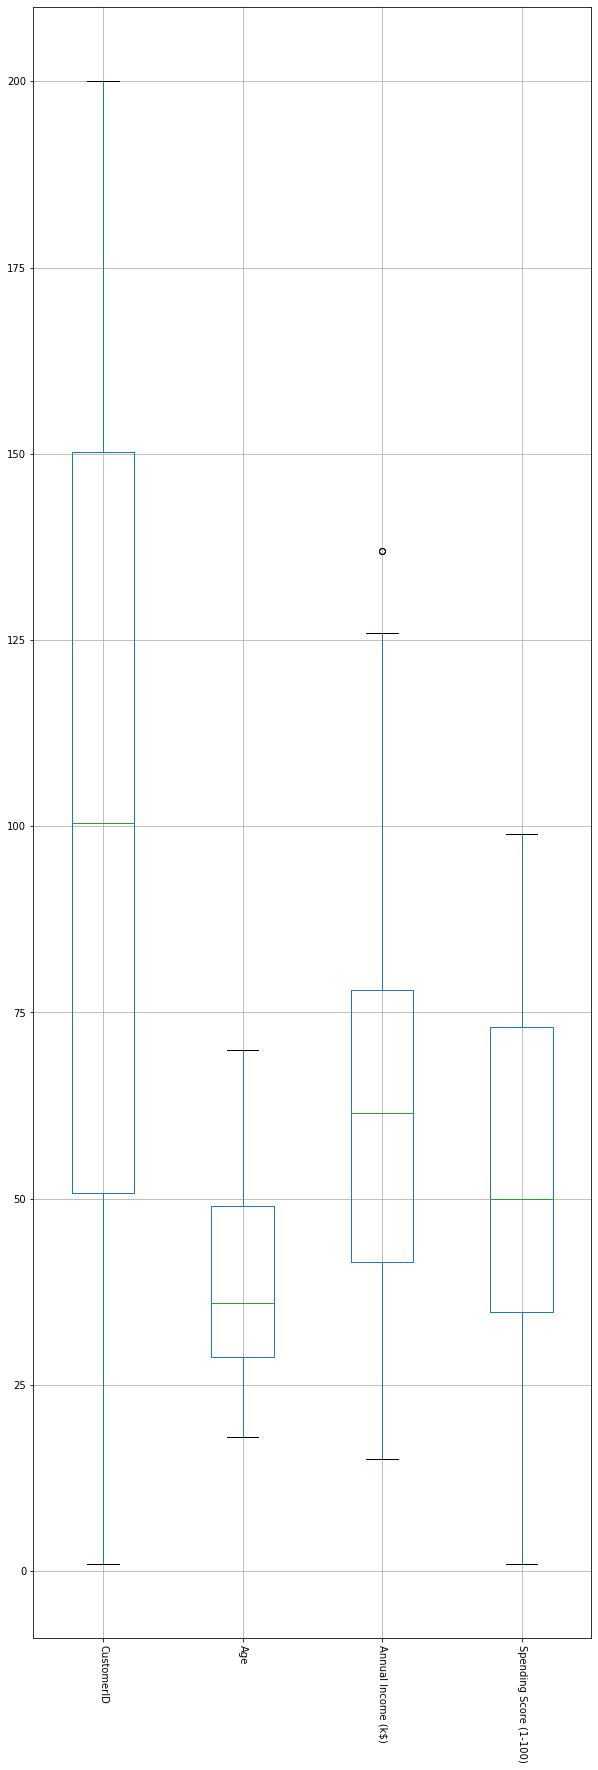

In [23]:
plt.figure(figsize=(10,30))
data.boxplot(rot = 270)

<AxesSubplot:>

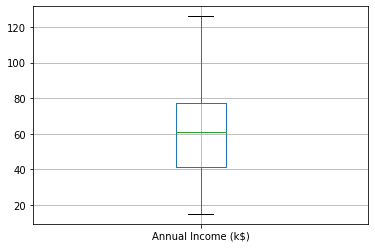

In [24]:
data['Annual Income (k$)'] = np.where(data['Annual Income (k$)'] > 130, 60.56, data['Annual Income (k$)'])
data.boxplot('Annual Income (k$)')

# 7. Encoding for Categorical values

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [26]:
data['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

# 8. Scaling the independant variables

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_scaled = mms.fit_transform(data)

In [29]:
x_scaled

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

# 9. Performing Clustering

In [30]:
from sklearn.cluster import KMeans
km=KMeans()
cluster = km.fit_predict(x_scaled)

C:\Users\spars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
values = data.columns
values

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# 10. Adding the Cluster Data to the primary Dataset

In [32]:
df = pd.DataFrame(x_scaled, columns = values)
df['Cluster_Value'] = pd.Series(cluster)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Value
0,0.000000,1.0,0.019231,0.000000,0.387755,7
1,0.005025,1.0,0.057692,0.000000,0.816327,7
2,0.010050,0.0,0.038462,0.009009,0.051020,2
3,0.015075,0.0,0.096154,0.009009,0.775510,2
4,0.020101,0.0,0.250000,0.018018,0.397959,2
...,...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918,5
196,0.984925,0.0,0.519231,1.000000,0.275510,0
197,0.989950,1.0,0.269231,1.000000,0.744898,4
198,0.994975,1.0,0.269231,0.410450,0.173469,6


# 11. Splitting into X and Y

In [33]:
x = df.iloc[:,1:5]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.410450,0.173469


In [34]:
y = df['Cluster_Value']
y

0      7
1      7
2      2
3      2
4      2
      ..
195    5
196    0
197    4
198    6
199    4
Name: Cluster_Value, Length: 200, dtype: int32

# 12. Splitting into training and testing

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 1) 

In [36]:
x_train

array([[0.58291457, 0.        , 0.86538462, 0.45045045, 0.42857143],
       [0.33668342, 0.        , 0.96153846, 0.2972973 , 0.47959184],
       [0.3919598 , 0.        , 0.09615385, 0.35135135, 0.52040816],
       [0.21105528, 1.        , 0.57692308, 0.21621622, 0.35714286],
       [0.08542714, 1.        , 0.03846154, 0.05405405, 0.66326531],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.63819095, 1.        , 0.42307692, 0.5045045 , 0.95918367],
       [0.52763819, 0.        , 0.05769231, 0.42342342, 0.41836735],
       [0.24120603, 0.        , 0.21153846, 0.22522523, 0.41836735],
       [0.33165829, 0.        , 0.48076923, 0.2972973 , 0.5       ],
       [0.27135678, 0.        , 0.61538462, 0.25225225, 0.44897959],
       [0.42211055, 0.        , 0.05769231, 0.35135135, 0.57142857],
       [0.91959799, 0.        , 0.21153846, 0.74774775, 0.8877551 ],
       [0.79396985, 1.        , 0.30769231, 0.56756757, 0.        ],
       [0.83417085, 1.        , 0.

In [37]:
x_test

array([[0.29145729, 0.        , 0.17307692, 0.27927928, 0.51020408],
       [0.20100503, 0.        , 0.90384615, 0.20720721, 0.34693878],
       [0.17085427, 0.        , 0.59615385, 0.16216216, 0.13265306],
       [0.51256281, 1.        , 0.94230769, 0.42342342, 0.59183673],
       [0.92462312, 0.        , 0.44230769, 0.75675676, 0.3877551 ],
       [0.99497487, 1.        , 0.26923077, 0.41045045, 0.17346939],
       [0.47738693, 1.        , 0.11538462, 0.40540541, 0.52040816],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.14572864, 0.        , 0.09615385, 0.12612613, 0.87755102],
       [0.84422111, 0.        , 0.34615385, 0.64864865, 0.26530612],
       [0.85929648, 1.        , 0.19230769, 0.64864865, 0.75510204],
       [0.09045226, 1.        , 0.65384615, 0.07207207, 0.28571429],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.44723618, 0.        , 0.61538462, 0.38738739, 0.45918367],
       [0.55276382, 1.        , 0.

In [38]:
y_train

116    3
67     3
78     2
42     1
17     7
      ..
133    5
137    4
72     3
140    0
37     2
Name: Cluster_Value, Length: 140, dtype: int32

In [39]:
y_test

58     2
40     3
34     3
102    1
184    0
198    6
95     7
4      2
29     2
168    0
171    4
18     1
11     2
89     3
110    1
118    3
159    5
35     2
136    0
59     1
51     7
16     2
44     3
94     2
31     2
162    6
38     2
28     3
193    5
27     7
47     2
165    5
194    0
177    4
176    6
97     2
174    0
73     3
69     2
172    6
108    1
107    1
189    5
14     7
56     3
19     2
114    2
39     2
185    4
124    0
98     1
123    4
119    3
53     1
33     7
179    4
181    5
106    3
199    4
138    6
Name: Cluster_Value, dtype: int32

# 13. Building the model

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# 14. Training the model

In [41]:
lr.fit(x_train, y_train)

LinearRegression()

# 15. Testing the model

In [42]:
pred_test=lr.predict(x_test)
pred_test

array([2.95373597, 0.52382725, 1.31689276, 2.97666899, 2.44903274,
       6.98268198, 5.32090674, 2.72179257, 3.73471445, 2.81114914,
       5.86837665, 3.39389519, 3.23328422, 1.72335177, 3.16020825,
       1.8942543 , 3.91334966, 3.72948591, 2.03335686, 3.38474918,
       4.70874985, 2.52769122, 1.42135348, 2.74552419, 3.69054666,
       5.67365643, 2.10571956, 2.08585103, 2.73332157, 4.71564238,
       2.93841825, 3.3839824 , 1.03006492, 5.95590372, 3.51712574,
       3.2008368 , 1.82080075, 1.26406457, 2.78883112, 4.68886013,
       2.83428356, 3.65643327, 3.1851183 , 4.13462949, 1.6003833 ,
       3.21821207, 3.86860484, 3.6168636 , 5.7448758 , 3.35749977,
       3.83767934, 5.13248478, 2.13631734, 3.19856864, 5.95198996,
       5.52853474, 3.53292009, 1.00819906, 7.86325342, 5.49029602])

# 16. Evaluation Metrics

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred_test, y_test)
mse

3.334933879741585

In [44]:
rmse = np.sqrt(mse)
rmse

1.8261801334319638

In [45]:
r2= r2_score(pred_test, y_test)
r2

-0.4309438928542464